In [1]:
import pandas as pd

In [2]:
sales = pd.read_csv("../datasets/dashboard_data/Sales data/Sales.csv")
item = pd.read_csv("../datasets/dashboard_data/Sales data/Item.csv")
country = pd.read_csv("../datasets/dashboard_data/Sales data/Country.csv")

In [4]:
sales.head(2)

OrderID   OrderDate  Gender AgeGroup  Channel    ShipDate ItemCode  \
0  100013196  2020-03-20  Female      30s   Online  2020-03-22   D10002   
1  100061261  2018-06-20  Female      50s  Offline         NaN   D10001   

   MapCode  Quantity  Revenue       Cost  
0       34        46  35576.6  29647.155  
1        5        69  10222.8   8518.990

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27657 entries, 0 to 27656
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderID    27657 non-null  int64  
 1   OrderDate  27657 non-null  object 
 2   Gender     27657 non-null  object 
 3   AgeGroup   27657 non-null  object 
 4   Channel    27657 non-null  object 
 5   ShipDate   19163 non-null  object 
 6   ItemCode   27657 non-null  object 
 7   MapCode    27657 non-null  int64  
 8   Quantity   27657 non-null  int64  
 9   Revenue    27657 non-null  float64
 10  Cost       27657 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 2.3+ MB


In [6]:
item.head(2)

ItemNo         Category      Item Type
0  A10001  Beauty & Health      Cosmetics
1  A10002  Beauty & Health  Personal Care

In [7]:
country.head(2)

Region  Country Code    Country Code2 Code3   Latitude   Longitude
0  Oceania             1  Australia    AU   AUS -35.306944  149.124297
1   Europe             2    Austria    AT   AUT  48.209206   16.372778

In [8]:
df = sales.copy()
df.shape

(27657, 11)

In [9]:
df = df.merge(item.rename(columns={'ItemNo':'ItemCode'}), on='ItemCode', how='left')

df.shape

(27657, 13)

In [10]:
df = df.merge(country.rename(columns={'Country Code':'MapCode'}), on='MapCode', how='left')

df.shape

(27657, 19)

In [11]:
df.head(3)

OrderID   OrderDate  Gender AgeGroup  Channel    ShipDate ItemCode  \
0  100013196  2020-03-20  Female      30s   Online  2020-03-22   D10002   
1  100061261  2018-06-20  Female      50s  Offline         NaN   D10001   
2  100071990  2020-06-20  Female      20s   Online  2020-06-22   D10001   

   MapCode  Quantity  Revenue       Cost Category        Item Type  Region  \
0       34        46  35576.6  29647.155   Office  Office Supplies    Asia   
1        5        69  10222.8   8518.990     Home        Household    Asia   
2        3        53  31731.5  26442.930     Home        Household  Europe   

   Country Code2 Code3   Latitude   Longitude  
0   Taiwan    TW   TWN  23.697810  120.960515  
1    China    CN   CHN  35.861660  104.195397  
2  Belgium    BE   BEL  50.503887    4.469936

In [12]:
df.to_csv("../datasets/dashboard_data/Sales data/Data.csv", index=None)

#### Compare Graph Functions

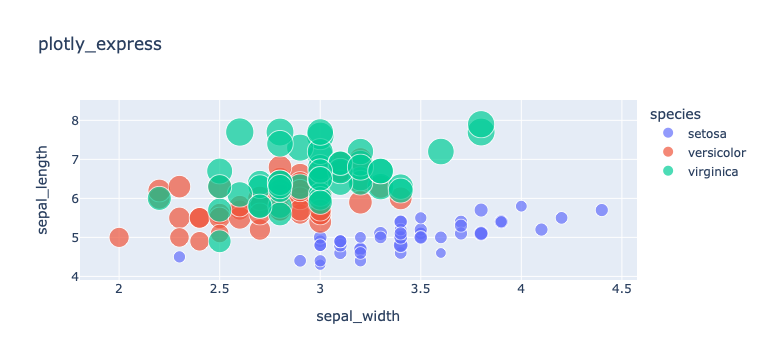

In [13]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species',
                 size='petal_length', hover_data=['petal_width'], title='plotly_express')

fig.show()

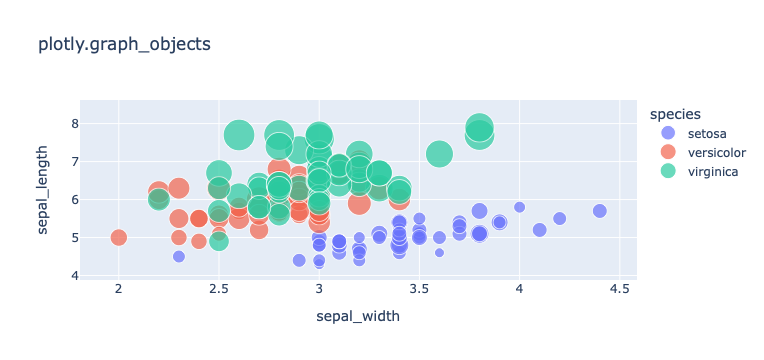

In [15]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df[df['species'] == 'setosa']['sepal_width'],
                         y=df[df['species'] == 'setosa']['sepal_length'],
                         mode='markers', name='setosa',
                         marker=dict(color='#6973FB', size=df[df['species']=='setosa']['petal_length']*10)
                        ))
fig.add_trace(go.Scatter(x=df[df['species'] == 'versicolor']['sepal_width'],
                         y=df[df['species'] == 'versicolor']['sepal_length'],
                         mode='markers', name='versicolor',
                         marker=dict(color='#F1644D', size=df[df['species']=='versicolor']['petal_length']*5)
                        ))
fig.add_trace(go.Scatter(x=df[df['species'] == 'virginica']['sepal_width'],
                         y=df[df['species'] == 'virginica']['sepal_length'],
                         mode='markers', name='virginica',
                         marker=dict(color='#29C99F', size=df[df['species']=='virginica']['petal_length']*4.6)
                        ))
fig.update_layout(xaxis=dict(title='sepal_width'),
                  yaxis=dict(title='sepal_length'),
                  legend_title_text='species',
                  title='plotly.graph_objects'
                 )
fig.show()

#### Bar Chart

In [16]:
import numpy as np

In [17]:
df = pd.read_csv("../datasets/dashboard_data/Sales data/Data.csv")

In [18]:
df.head(2)

OrderID   OrderDate  Gender AgeGroup  Channel    ShipDate ItemCode  \
0  100013196  2020-03-20  Female      30s   Online  2020-03-22   D10002   
1  100061261  2018-06-20  Female      50s  Offline         NaN   D10001   

   MapCode  Quantity  Revenue       Cost Category        Item Type Region  \
0       34        46  35576.6  29647.155   Office  Office Supplies   Asia   
1        5        69  10222.8   8518.990     Home        Household   Asia   

  Country Code2 Code3  Latitude   Longitude  
0  Taiwan    TW   TWN  23.69781  120.960515  
1   China    CN   CHN  35.86166  104.195397

In [19]:
df['year'] = df['OrderDate'].str.slice(start=0, stop=4)
df['month'] = df['OrderDate'].str.slice(start=5, stop=7)

df = df.sort_values(by=['Region', 'Channel', 'Category', 'Item Type', 'year', 'month', 'Gender'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27657 entries, 3864 to 18422
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderID    27657 non-null  int64  
 1   OrderDate  27657 non-null  object 
 2   Gender     27657 non-null  object 
 3   AgeGroup   27657 non-null  object 
 4   Channel    27657 non-null  object 
 5   ShipDate   19163 non-null  object 
 6   ItemCode   27657 non-null  object 
 7   MapCode    27657 non-null  int64  
 8   Quantity   27657 non-null  int64  
 9   Revenue    27657 non-null  float64
 10  Cost       27657 non-null  float64
 11  Category   27657 non-null  object 
 12  Item Type  27657 non-null  object 
 13  Region     27657 non-null  object 
 14  Country    27657 non-null  object 
 15  Code2      27657 non-null  object 
 16  Code3      27657 non-null  object 
 17  Latitude   27657 non-null  float64
 18  Longitude  27657 non-null  float64
 19  year       27657 non-null  object 
 20  mon

In [21]:
pd.options.display.float_format = '{:.2f}'.format

In [22]:
d20 = df[df['year'] == '2020'].copy()

d20['Margin'] = d20['Revenue'] - d20['Cost']

In [23]:
df_g = d20.loc[:, ['Country', 'Revenue', 'Margin']].groupby(by=['Country'], as_index=False).sum()
df_g = df_g.sort_values(by=['Revenue'], ascending=False)

In [24]:
df_g['rank'] = list(range(1, len(df_g['Country'])+1))
df_gl = df_g[df_g['rank'] <= 10].reset_index(drop=True)

df_gl

Country     Revenue      Margin  rank
0                     China 35419012.93 11433231.09     1
1  United States of America 30921686.00 10058265.87     2
2                 Australia 17937580.10  5998658.34     3
3                    Canada 12659751.70  3981548.49     4
4                     Japan 11144287.40  3429964.29     5
5                    Russia 10409143.00  3230082.90     6
6                    Sweden  9347376.63  3072071.39     7
7               South Korea  9333921.70  3062749.61     8
8                     Spain  9294640.60  3052992.63     9
9                   Iceland  8828988.90  3032787.99    10

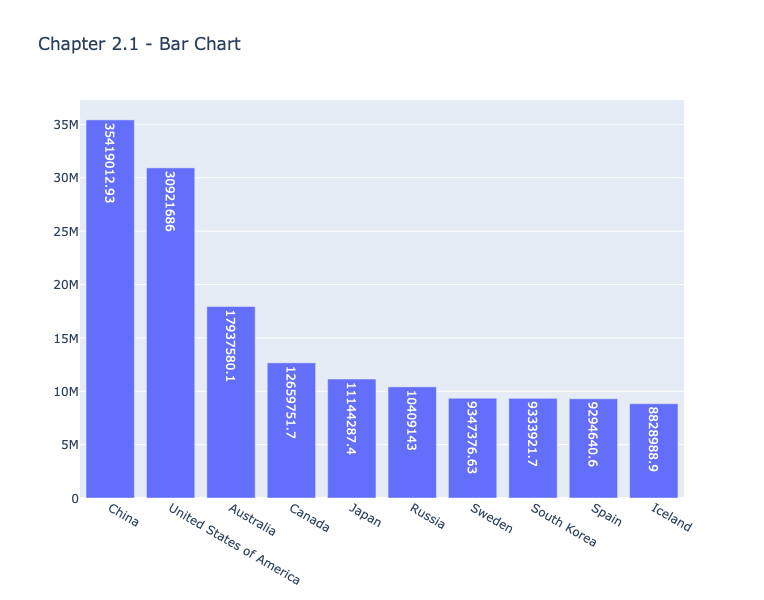

In [27]:
trace = go.Bar(x = df_gl['Country'],
               y = df_gl['Revenue'],
               text = round(df_gl['Revenue'], 2)
              )
data = [trace]
layout = go.Layout(title='Chapter 2.1 - Bar Chart', width=1000, height=600)
fig = go.Figure(data, layout)

fig.show()

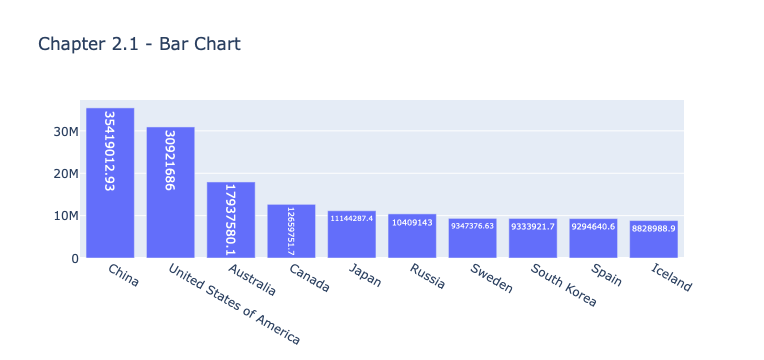

In [28]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_gl['Country'],
                     y=df_gl['Revenue'],
                     text = df_gl['Revenue']
                    ))
fig.update_layout(title='Chapter 2.1 - Bar Chart')
fig.show()

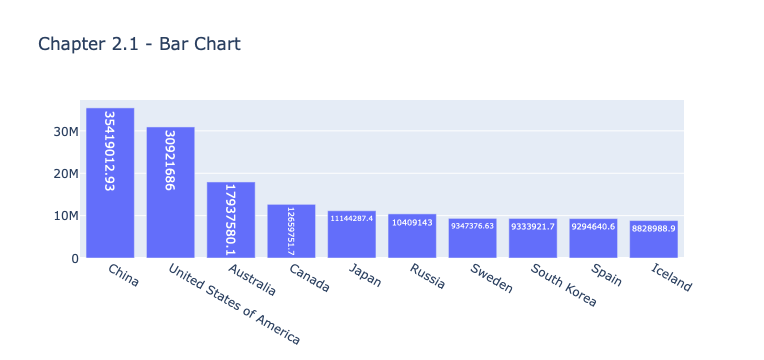

In [30]:
fig = go.Figure(data =[
    go.Bar(x=df_gl['Country'],
           y=df_gl['Revenue'],
           text=round(df_gl['Revenue'],2))
])
fig.update_layout(title='Chapter 2.1 - Bar Chart')
fig.show()

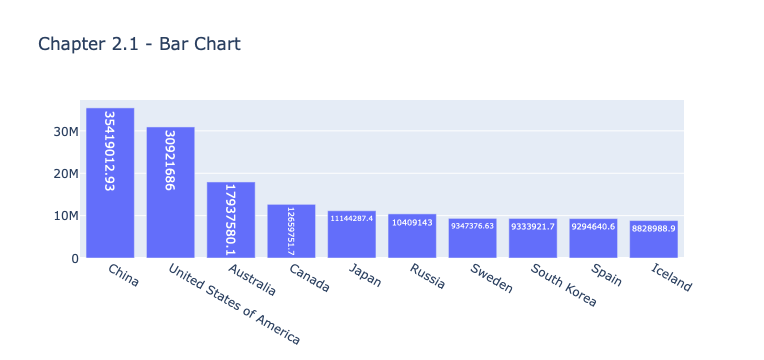

In [31]:
trace = go.Bar(x=df_gl['Country'],
               y=df_gl['Revenue'],
               text = round(df_gl['Revenue'], 2)
              )
data = [trace]
layout = go.Layout(title='Chapter 2.1 - Bar Chart')
fig = go.Figure(data, layout)

fig.show()

#### 그래프 중첩 입력

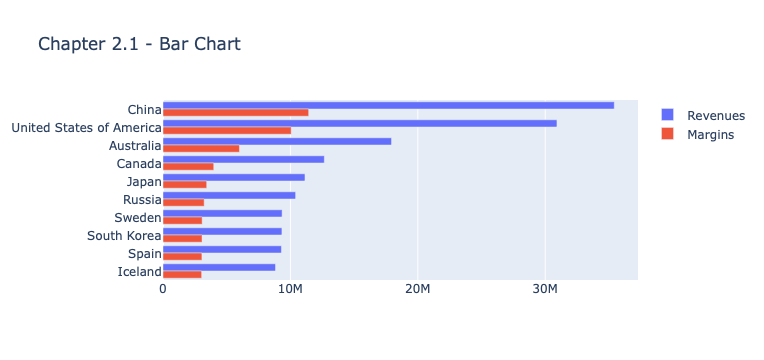

In [32]:
fig = go.Figure()
fig.add_trace(go.Bar(y=df_gl['Country'],
                     x=df_gl['Revenue'],
                     name='Revenues',
                     orientation='h'
                    ))
fig.add_trace(go.Bar(y=df_gl['Country'],
                     x=df_gl['Margin'],
                     name='Margins',
                     orientation='h'
                    ))

fig.update_layout(title='Chapter 2.1 - Bar Chart',
                  barmode='group',
                  yaxis=dict(autorange='reversed'))
fig.show()

#### Scatter and Line

In [34]:
df = pd.read_csv("../datasets/dashboard_data/Sales data/Data.csv")

df['year'] = df['OrderDate'].str.slice(start=0, stop=4)
df['month'] = df['OrderDate'].str.slice(start=5, stop=7)

df = df.sort_values(by=['Region', 'Channel', 'Category', 'Item Type', 'year', 'month', 'Gender'])

In [35]:
df_g = df.loc[:, ['Revenue', 'year', 'month']].groupby(by=['year', 'month'], as_index=False).sum()

In [36]:
year = list(df_g['year'].unique())
year.sort()
year

['2017', '2018', '2019', '2020']

In [37]:
df_g.head()

year month     Revenue
0  2017    01 14710353.64
1  2017    02 14334223.30
2  2017    03 15247314.80
3  2017    04 13827194.10
4  2017    05 15047864.90

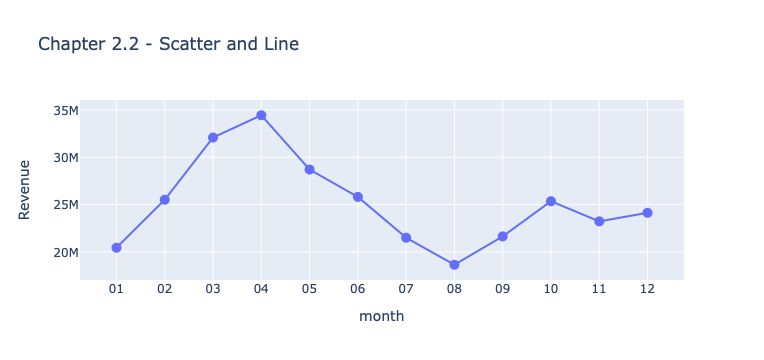

In [39]:
df_g20 = df_g[df_g['year'] == '2020']

trace = go.Scatter(x=df_g20['month'],
                   y=df_g20['Revenue'],
                   mode='lines+markers',
                   marker=dict(size=10)
                  )
data =[trace]
layout = go.Layout(title='Chapter 2.2 - Scatter and Line',
                   xaxis=dict(title='month'),
                   yaxis=dict(title='Revenue'))
fig = go.Figure(data, layout)

fig.show()

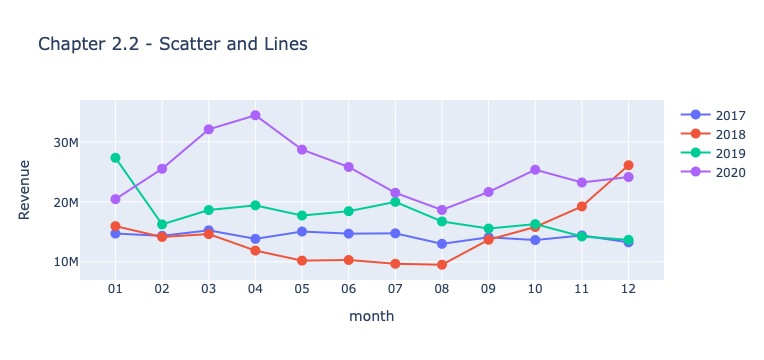

In [41]:
traces = []
for years in year:
    tmp = df_g[df_g['year'] == years]
    traces.append(go.Scatter(x=tmp['month'],
                            y=tmp['Revenue'],
                            mode='lines+markers',
                            marker=dict(size=10),
                            name=years
                           ))
data = traces
layout = go.Layout(title='Chapter 2.2 - Scatter and Lines',
                   xaxis=dict(title='month'),
                   yaxis=dict(title='Revenue'))
fig = go.Figure(data, layout)

fig.show()

#### Pie Chart

In [42]:
df.head()

OrderID   OrderDate  Gender AgeGroup  Channel    ShipDate ItemCode  \
3864   222376000  2017-01-14  Female      20s  Offline  2017-01-16   A10001   
1138   134172523  2017-03-23  Female      40s  Offline  2017-03-25   A10001   
15588  605686843  2017-03-09  Female      20s  Offline         NaN   A10001   
27570  998083722  2017-03-17  Female      20s  Offline         NaN   A10001   
16624  640613067  2017-05-22  Female      50s  Offline  2017-05-27   A10001   

       MapCode  Quantity  Revenue  ...         Category  Item Type  Region  \
3864        22        66 21921.60  ...  Beauty & Health  Cosmetics  Africa   
1138        22        53 74453.40  ...  Beauty & Health  Cosmetics  Africa   
15588       29        67 16048.20  ...  Beauty & Health  Cosmetics  Africa   
27570       29        42 20731.80  ...  Beauty & Health  Cosmetics  Africa   
16624       18        55 26579.80  ...  Beauty & Health  Cosmetics  Africa   

       Country Code2 Code3 Latitude  Longitude  year month  
3864   Morocco    MA   MAR    31.79      -7.09  2017    01  
1138   Morocco    MA   MAR    31.79      -7.09  2017    03  
15588  Senegal    SN   SEN    14.50     -14.45  2017    03  
27570  Senegal    SN   SEN    14.50     -14.45  2017    03  
16624    Kenya    KE   KEN     1.00      38.00  2017    05  

[5 rows x 21 columns]

In [43]:
df_g = df[df['year'] =='2020'].copy()

In [44]:
df_gl = df_g.loc[:, ['AgeGroup', 'Revenue']].groupby(by=['AgeGroup'], as_index=False).sum()

df_gl

AgeGroup     Revenue
0      20s 74300516.43
1      30s 91370774.95
2      40s 59707855.34
3      50s 49720921.40
4      60s 26406450.00

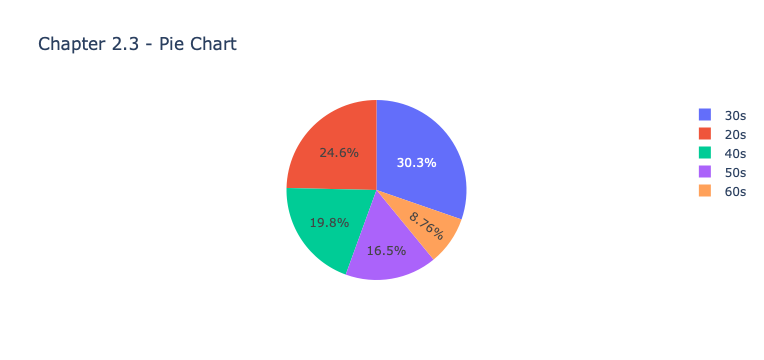

In [46]:
trace = go.Pie(labels=df_gl['AgeGroup'],
               values=df_gl['Revenue']
              )
data = [trace]
layout = go.Layout(title='Chapter 2.3 - Pie Chart')
fig = go.Figure(data, layout)

fig.show()

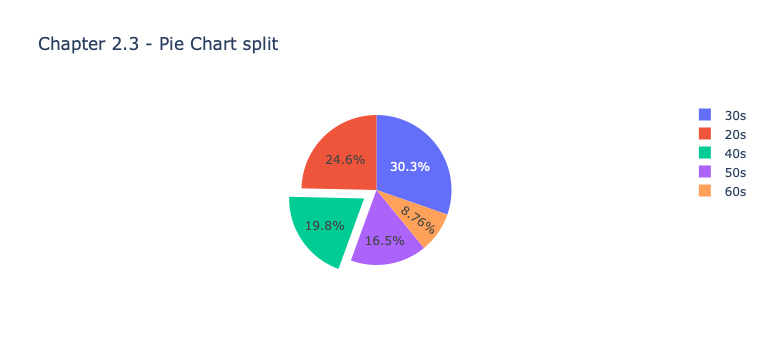

In [47]:
trace = go.Pie(labels=df_gl['AgeGroup'],
               values = df_gl['Revenue'],
               pull = [0, 0, 0.2, 0, 0]
              )
data = [trace]
layout = go.Layout(title='Chapter 2.3 - Pie Chart split')
fig = go.Figure(data, layout)

fig.show()

#### Sankey Diagrams

In [48]:
df_g = df[df['year'] == '2020'].iloc[:, [13, 4, 11, 9]].copy()
df_g = df_g.sort_values(by=['Region', 'Channel', 'Category'])

df_g.head(2)

Region  Channel         Category  Revenue
2009   Africa  Offline  Beauty & Health 30171.10
10034  Africa  Offline  Beauty & Health 38133.80

In [49]:
value1 = df_g.groupby(by=['Region', 'Channel'], as_index=False).sum()
value1

Region  Channel     Revenue
0   Africa  Offline  4015718.10
1   Africa   Online 12342417.50
2  America  Offline 13206995.20
3  America   Online 39311590.60
4     Asia  Offline 27794901.85
5     Asia   Online 80291457.54
6   Europe  Offline 27142873.33
7   Europe   Online 75434600.10
8  Oceania  Offline  5444565.40
9  Oceania   Online 16521398.50

In [50]:
value2 = df_g.groupby(by=['Channel', 'Category'], as_index=False).sum()
value2

Channel         Category      Revenue
0  Offline  Beauty & Health  12873974.40
1  Offline          Clothes   2482423.20
2  Offline            Foods  57785592.18
3  Offline             Home   2770573.30
4  Offline           Office   1692490.80
5   Online  Beauty & Health  37548449.20
6   Online          Clothes   6740321.60
7   Online            Foods 158206931.14
8   Online             Home  14696612.50
9   Online           Office   6709149.80

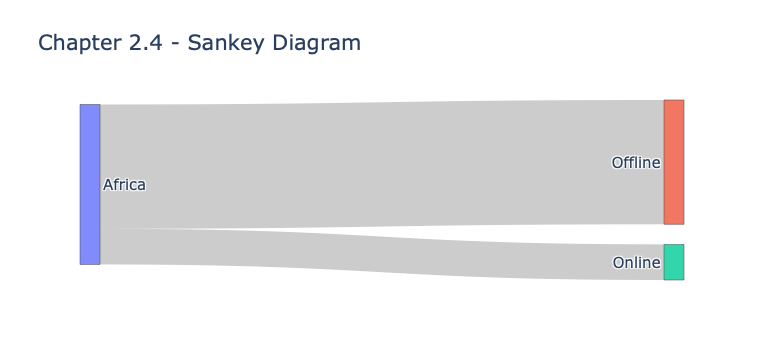

In [51]:
trace = go.Sankey(node= dict(label=['Africa', 'Offline', 'Online']),
                  link = dict(source=[0, 0],
                              target=[1, 2],
                              value = [43015718.1, 12342417.5])
                 )
data = [trace]
layout = go.Layout(title='Chapter 2.4 - Sankey Diagram', font_size=15)
fig = go.Figure(data, layout)

fig.show()

In [52]:
l_c1 = list(df_g['Region'].unique())
l_c2 = list(df_g['Channel'].unique())
l_c3 = list(df_g['Category'].unique())

In [53]:
labels = l_c1 + l_c2 + l_c3

print(labels)

['Africa', 'America', 'Asia', 'Europe', 'Oceania', 'Offline', 'Online', 'Beauty & Health', 'Clothes', 'Foods', 'Home', 'Office']


In [54]:
source1 = list(np.repeat(range(0, len(l_c1)), len(l_c2)))
source2 = list(np.repeat(range(len(l_c1), len(l_c1) + len(l_c2)), len(l_c3)))
sources = source1 + source2

print(sources)

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6]


In [55]:
target1 = list(range(len(l_c1), len(l_c1)+len(l_c2))) * len(l_c1)
target2 = list(range(len(l_c1)+len(l_c2) , len(l_c1)+len(l_c2)+len(l_c3))) * len(l_c2)

targets = target1 + target2

print(targets)

[5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11]


In [56]:
values = list(value1['Revenue']) + list(value2['Revenue'])

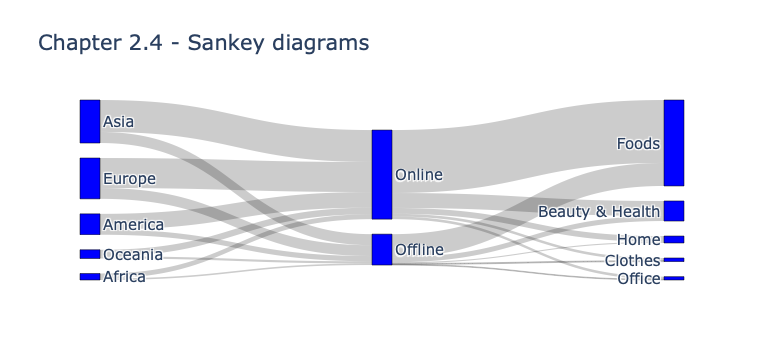

In [58]:
trace = go.Sankey(node = dict(label = labels,
                              pad=15,
                              thickness=20,
                              line=dict(color='black', width=0.5),
                              color='blue'),
                  link = dict(source = sources,
                              target = targets,
                              value = values)
                 )
data = [trace]
layout = go.Layout(title='Chapter 2.4 - Sankey diagrams', font_size=15)
fig = go.Figure(data, layout)

fig.show()

#### Box Plot

In [59]:
df_g = df[df['year'] == '2020'].loc[:, ['Region', 'Revenue']].copy()

df_g.head(3)

Region  Revenue
2009   Africa 30171.10
10034  Africa 38133.80
23660  Africa 39590.10

In [60]:
regions = list(df_g['Region'].unique())
regions.sort()

regions

['Africa', 'America', 'Asia', 'Europe', 'Oceania']

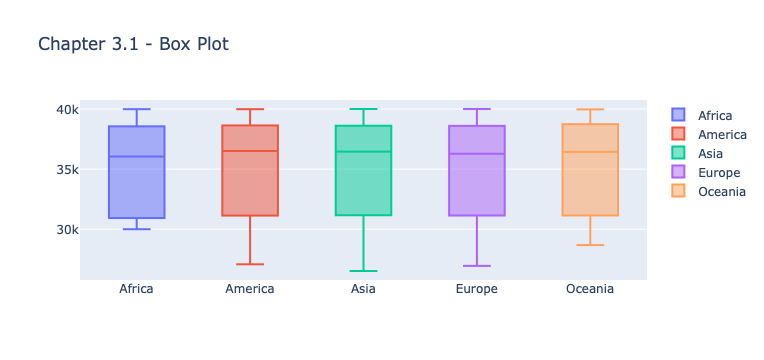

In [62]:
traces = []

for region in regions:
    tmp = df_g[df_g['Region'] == region]
    traces.append(go.Box(y=tmp['Revenue'], name=region))
    
data = traces
layout = go.Layout(title='Chapter 3.1 - Box Plot')
fig = go.Figure(data, layout)

fig.show()

#### Histograms

In [63]:
df_g = df[df['year'] =='2020'].loc[:, ['AgeGroup', 'Quantity']].copy()
df_g.head(3)

AgeGroup  Quantity
2009       30s        31
10034      60s       169
23660      40s        42

In [64]:
ages = list(df_g['AgeGroup'].unique())

ages.sort()
ages

['20s', '30s', '40s', '50s', '60s']

In [65]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

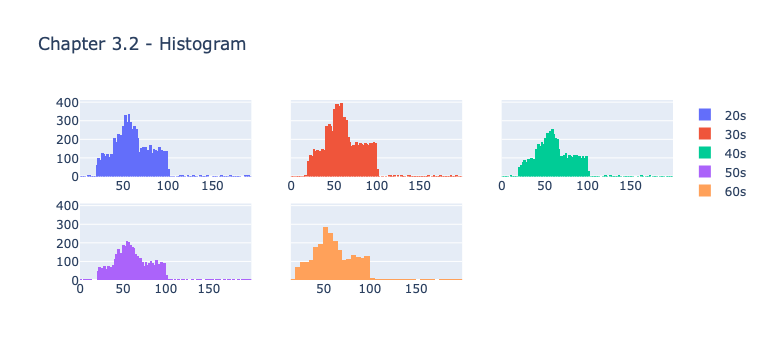

In [66]:
fig = make_subplots(rows=2, cols=3, shared_yaxes='all')

trace = []
for age in ages:
    trace.append(go.Histogram(x=df[df['AgeGroup'] == age]['Quantity'], name=age))
    
fig.append_trace(trace[0], 1, 1)
fig.append_trace(trace[1], 1, 2)
fig.append_trace(trace[2], 1, 3)
fig.append_trace(trace[3], 2, 1)
fig.append_trace(trace[4], 2, 2)

fig.update_layout(title='Chapter 3.2 - Histogram')
fig.show()

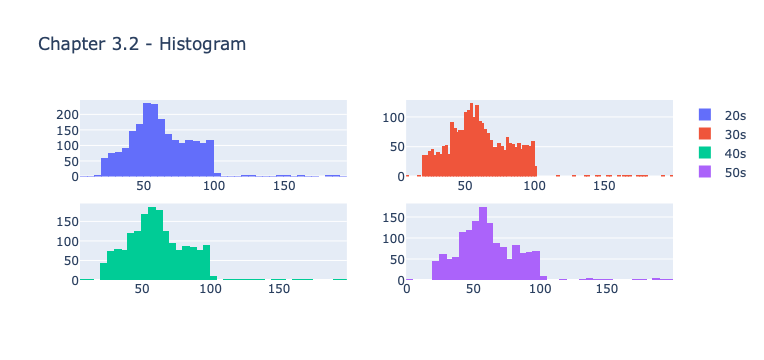

In [67]:
fig = make_subplots(rows=2, cols=2)

trace0 = go.Histogram(x=df_g[df_g['AgeGroup'] == ages[0]]['Quantity'], name=ages[0])
trace1 = go.Histogram(x=df_g[df_g['AgeGroup'] == ages[1]]['Quantity'], name=ages[1])
trace2 = go.Histogram(x=df_g[df_g['AgeGroup'] == ages[2]]['Quantity'], name=ages[2])
trace3 = go.Histogram(x=df_g[df_g['AgeGroup'] == ages[3]]['Quantity'], name=ages[3])

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.update_layout(title='Chapter 3.2 - Histogram')
fig.show()
                             

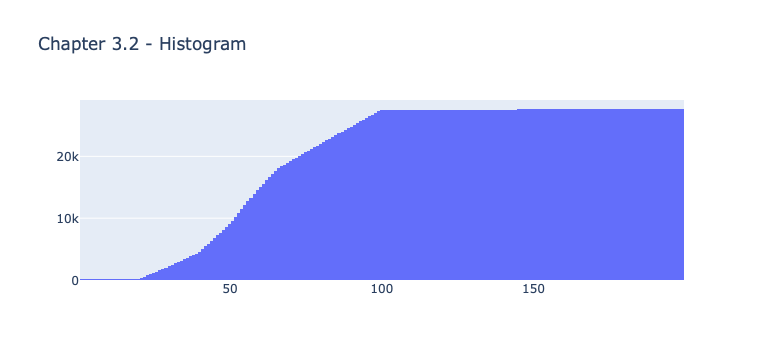

In [68]:
trace = go.Histogram(x=df['Quantity'], cumulative_enabled=True)
data=[trace]

fig = go.Figure(data)
fig.update_layout(title='Chapter 3.2 - Histogram')
fig.show()

#### Error Bar

In [69]:
dfl = df[(df['Region'] == 'Asia') & (df['Category'] == 'Foods')].copy()

In [70]:
df_g = dfl.loc[:, ['Channel', 'year', 'Revenue']].copy()

g_mean = df_g.groupby(by=['Channel', 'year'], as_index=False).mean()
g_std = df_g.groupby(by=['Channel', 'year'], as_index=False).std()
g_n = df_g.groupby(by=['Channel', 'year'], as_index=False).count()

df_g1 = pd.concat([g_mean.reset_index(drop=True),
                   g_std['Revenue'].reset_index(drop=True),
                   g_n['Revenue'].reset_index(drop=True)], axis=1)

df_g1.columns = ['Channel', 'year', 'mean', 'sd', 'n']

df_g1

Channel  year     mean       sd     n
0  Offline  2017 26880.61 17991.99   571
1  Offline  2018 24327.82 15074.61   494
2  Offline  2019 33775.66  7986.38   486
3  Offline  2020 35251.41  3605.51   596
4   Online  2017 27472.50 18373.43   284
5   Online  2018 27586.79 17518.94   339
6   Online  2019 33973.61  9131.46   431
7   Online  2020 35282.40  3652.67  1607

In [71]:
df_g2 = df_g1[df_g1['Channel'] == 'Offline'].copy()

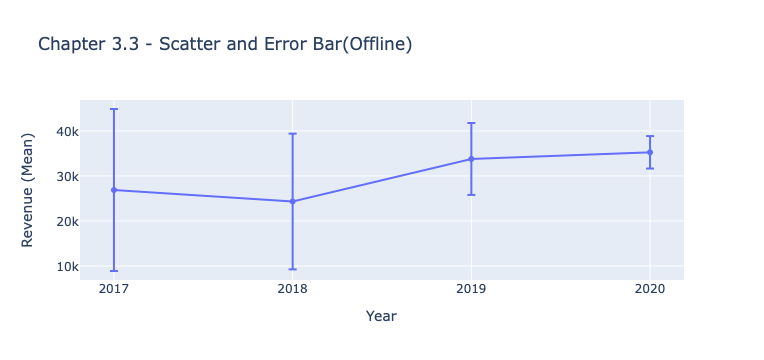

In [72]:
trace = go.Scatter(x=df_g2['year'],
                   y=df_g2['mean'],
                   error_y = dict(type='data', array=df_g2['sd'],
                                 ),
                   name='Offline'
                  )
data = [trace]
layout = go.Layout(title='Chapter 3.3 - Scatter and Error Bar(Offline)',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Revenue (Mean)')
                  )
fig = go.Figure(data, layout)
fig.show()